In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score




In [2]:
#veri toplama
data_path = "C:/Users/Lenovo/Desktop/tcmb_aylik_veriler.csv"
data_frame = pd.read_csv(data_path)

In [3]:

# Tarih sütununu indeks olarak ayarlayı
data_frame['Tarih']=pd.to_datetime(data_frame['Tarih'])

data_frame.sort_values(by='Tarih', inplace=True)
data_frame.set_index('Tarih', inplace=True)

print(data_frame.head())
print("Total number of unique index values:", data_frame.index.nunique())

# Optionally, display the total number of rows in the DataFrame
print("Total number of rows in the DataFrame:", len(data_frame))

            tuketici_kredisi_faizi  1_aylik_mevduat_faizi  \
Tarih                                                       
2020-01-01                  14.606                 9.3120   
2020-02-01                  13.835                 8.9775   
2020-03-01                  14.040                 8.9725   
2020-04-01                  12.065                 8.7625   
2020-05-01                  10.682                 7.3260   

            3_aylik_mevduat_faizi  usd_mevduat_faizi  eur_mevduat_faizi  \
Tarih                                                                     
2020-01-01                10.2000             1.3680             0.1680   
2020-02-01                 9.8775             1.1675             0.1425   
2020-03-01                10.0850             0.9550             0.1300   
2020-04-01                10.0575             1.0950             0.1725   
2020-05-01                 8.3060             0.7540             0.1820   

            tuketici_fiyat_endeksi  ito_gecinm

In [4]:
data_frame = data_frame.fillna(data_frame.mean())

In [5]:
data_frame.isnull().sum()

tuketici_kredisi_faizi           0
1_aylik_mevduat_faizi            0
3_aylik_mevduat_faizi            0
usd_mevduat_faizi                0
eur_mevduat_faizi                0
tuketici_fiyat_endeksi           0
ito_gecinme_endeksi              0
reel_kesim_guven_endeksi         0
istihdam_orani                   0
issizlik_orani                   0
konut_fiyat_endeksi              0
toplam_sifir_konut_satisi        0
toplam_ikinciel_konut_satisi     0
resmi_rezerv_varliklari          0
toplam_binek_otomobil_uretimi    0
usd_try                          0
eur_try                          0
gbp_try                          0
dtype: int64

In [6]:

selected_features=['tuketici_kredisi_faizi','1_aylik_mevduat_faizi',
       '3_aylik_mevduat_faizi', 'usd_mevduat_faizi', 'eur_mevduat_faizi',
       'tuketici_fiyat_endeksi', 'ito_gecinme_endeksi','konut_fiyat_endeksi','resmi_rezerv_varliklari','usd_try', 'eur_try', 'gbp_try','istihdam_orani']

data_frame=data_frame[selected_features]

In [7]:
X = data_frame[['tuketici_kredisi_faizi','1_aylik_mevduat_faizi','3_aylik_mevduat_faizi','usd_mevduat_faizi','eur_mevduat_faizi','tuketici_fiyat_endeksi','ito_gecinme_endeksi','konut_fiyat_endeksi','resmi_rezerv_varliklari','usd_try','eur_try','gbp_try']]
y = data_frame['istihdam_orani']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
test_dates = X_test.index


RANDOM FOREST

In [8]:
rf_regressor = RandomForestRegressor(n_estimators=100,random_state=43)
rf_regressor.fit(X_train,y_train)
y_pred = rf_regressor.predict(X_test)
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", error_score)


R squared error :  0.8533284194239316


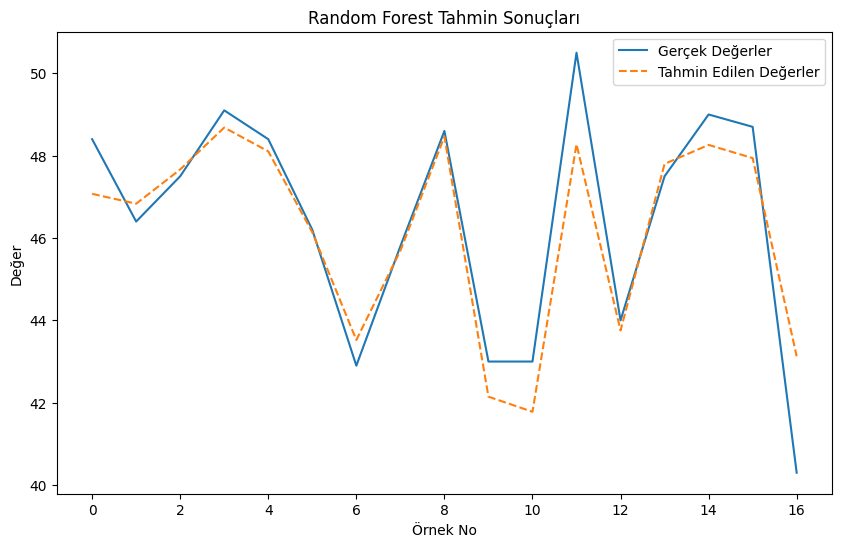

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='Gerçek Değerler')
plt.plot(range(len(y_pred)), y_pred, label='Tahmin Edilen Değerler', linestyle='--')
plt.xlabel('Örnek No')
plt.ylabel('Değer')
plt.title('Random Forest Tahmin Sonuçları')
plt.legend()
plt.show()

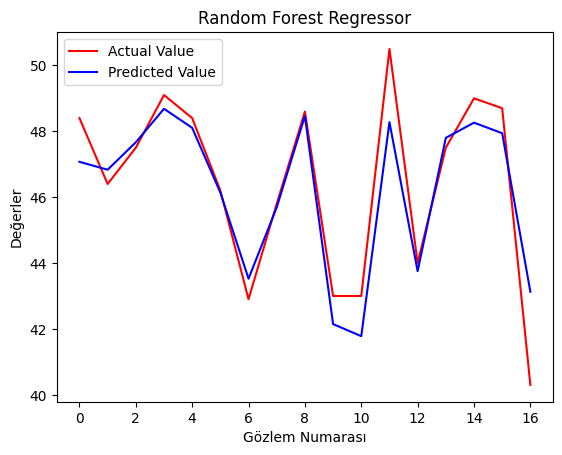

In [10]:
y_test_list = list(y_test)
plt.plot(y_test_list, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Random Forest Regressor')
plt.xlabel('Gözlem Numarası')
plt.ylabel('Değerler')
plt.legend()
plt.show()

In [11]:
# Veri seti boyutlarını kontrol etme
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")


X_train shape: (38, 12)
X_test shape: (17, 12)
y_train shape: (38,)
y_test shape: (17,)
y_pred shape: (17,)


In [12]:
r2_random = r2_score(y_test, y_pred)
print(f'R² Skoru: {r2_random}')

R² Skoru: 0.8533284194239316


In [13]:
# Ortalama Kare Hatası (MSE)
mse_random = mean_squared_error(y_test, y_pred)
print(f"Ortalama Kare Hatası: {mse_random:.2f}")

Ortalama Kare Hatası: 1.12


SUPPORT VECTOR MACHINE

In [14]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()



In [15]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [16]:
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled.ravel())

SVR()

In [17]:
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

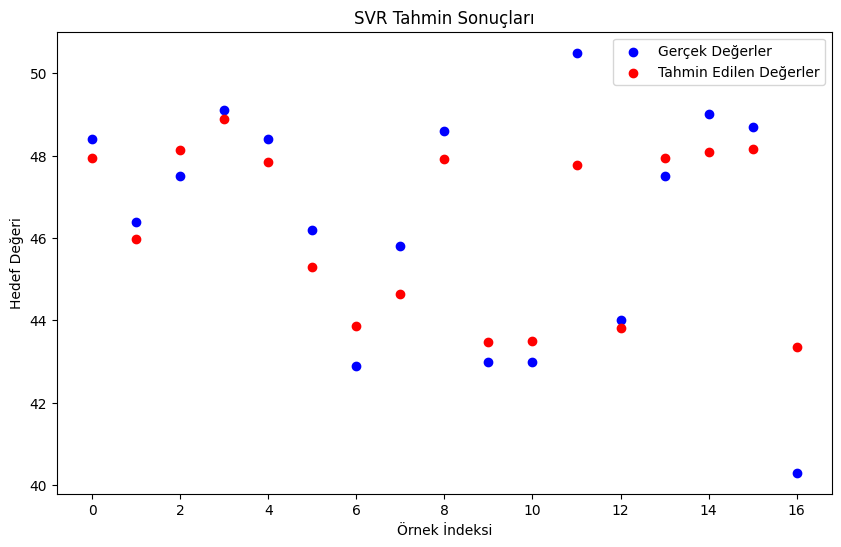

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Gerçek Değerler')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Tahmin Edilen Değerler')
plt.title('SVR Tahmin Sonuçları')
plt.xlabel('Örnek İndeksi')
plt.ylabel('Hedef Değeri')
plt.legend()
plt.show()

In [19]:
mse_support = mean_squared_error(y_test, y_pred)
print(f"Ortalama Kare Hatası (MSE): {mse_support}")

Ortalama Kare Hatası (MSE): 1.3627995845606826


In [20]:
r2_support = r2_score(y_test, y_pred)
print(f'R² Skoru: {r2_support}')

R² Skoru: 0.8219730235781597


BASİT YAPAY SİNİR AĞLARI

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



In [22]:
y_train_np = y_train.values
y_test_np = y_test.values


In [23]:
y_train_np = y_train.values.reshape(-1, 1)


In [24]:
print(X_test_scaled.shape)  # (num_samples, num_features)
print(y_test_scaled.shape)  # (num_samples,)
print(y_pred_scaled.shape)  # (num_samples,)


(17, 12)
(17, 1)
(17,)


In [25]:
# TensorFlow modelini oluşturma
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1)
])

# Modeli derleme
model.compile(optimizer='adam', loss='mse')

# Eğitim sürecindeki kayıpları izleme
history = model.fit(X_train_scaled, y_train, epochs=500, verbose=0)


c:\Users\Lenovo\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


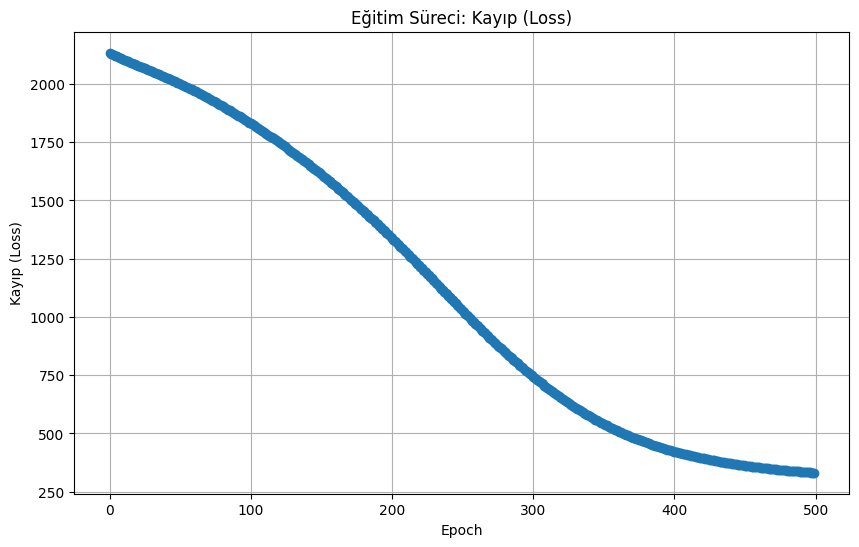

In [26]:
# Eğitim kayıplarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], marker='o')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.title('Eğitim Süreci: Kayıp (Loss)')
plt.grid(True)
plt.show()

# Test verileri üzerinde tahminler yapma

In [27]:
y_pred = model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [28]:

# Tahminleri ve gerçek değerleri orijinal ölçeğe döndürme
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()


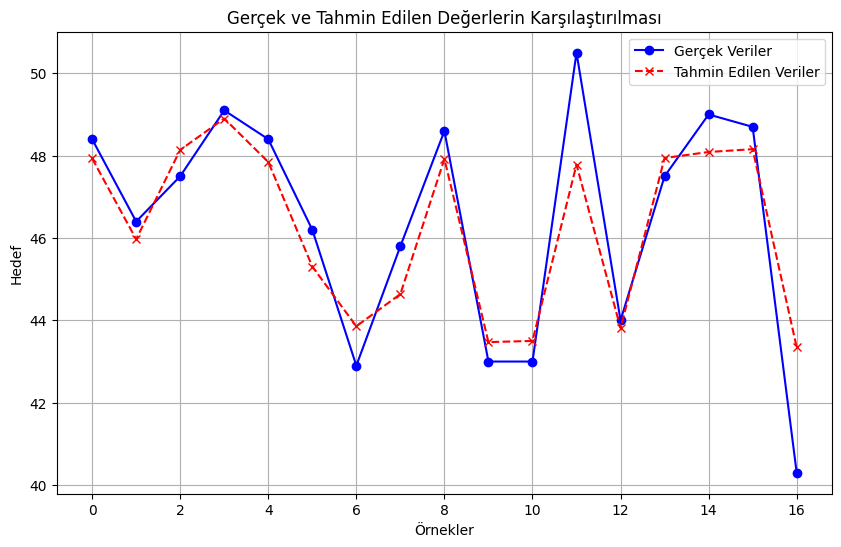

In [29]:
# Gerçek ve tahmin edilen değerleri görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, color='blue', marker='o', linestyle='-', label='Gerçek Veriler')
plt.plot(np.arange(len(y_pred)), y_pred, color='red', marker='x', linestyle='--', label='Tahmin Edilen Veriler')
plt.xlabel('Örnekler')
plt.ylabel('Hedef')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması')
plt.legend()
plt.grid(True)
plt.show()


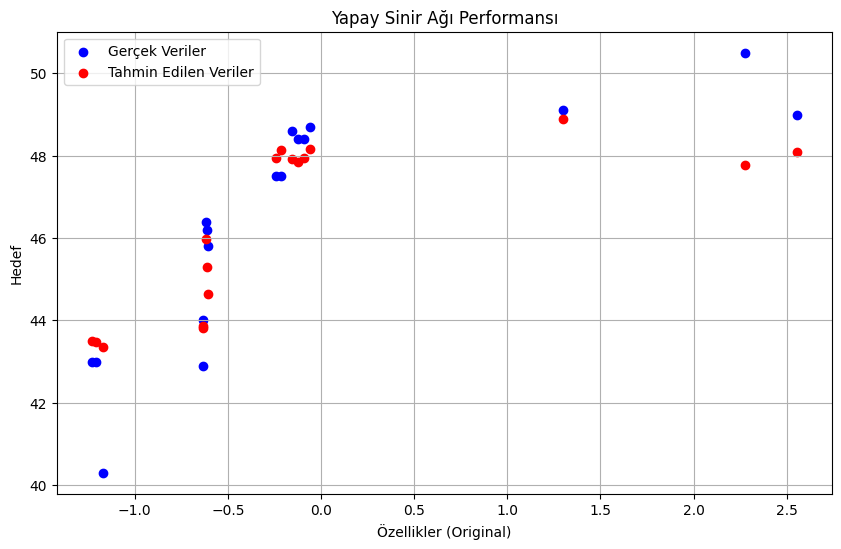

In [30]:

# Gerçek ve tahmin edilen değerleri görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], y_test, color='blue', label='Gerçek Veriler')
plt.scatter(X_test_scaled[:, 0], y_pred, color='red', label='Tahmin Edilen Veriler')
plt.xlabel('Özellikler (Original)')
plt.ylabel('Hedef')
plt.title('Yapay Sinir Ağı Performansı')
plt.legend()
plt.grid(True)
plt.show()




In [31]:
# Performans metriklerini hesaplama
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Ortalama Kare Hata (MSE): {mse}')
print(f'R² Skoru: {r2}')

Ortalama Kare Hata (MSE): 1.3627995845606826
R² Skoru: 0.8219730235781597


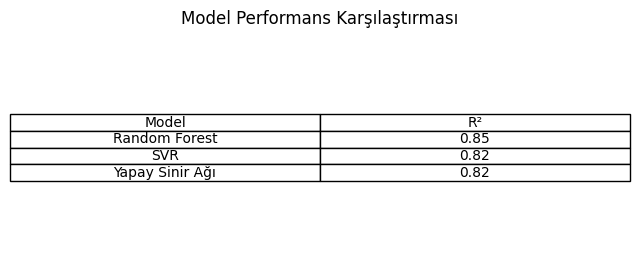

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Örnek sonuçlar
results = {
    'Model': ['Random Forest', 'SVR', 'Yapay Sinir Ağı'],
    'R²': [0.85, 0.82, 0.82],
}

# DataFrame oluşturun
results_df = pd.DataFrame(results)

# Tabloyu oluşturun
fig, ax = plt.subplots(figsize=(8, 3)) # Tablo boyutu
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')

plt.title('Model Performans Karşılaştırması')
plt.show()
